In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
#import graphviz

In [4]:
churnData = pd.read_csv("C:\DataSets\Churn.csv")
df = pd.DataFrame(churnData)
df.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN
0,349224,FL,ACTIVATION,Active,1365.94,1183.71,10,3,UNLIMITED
1,253440,FL,ACTIVATION,Active,7617.94,7617.94,13,3,OTHER
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE
3,226167,GA,ACTIVATION,Active,658.80,658.80,14,3,100 MINUTE
4,286110,AL,ACTIVATION,Active,587.45,526.46,12,3,UNLIMITED


In [5]:
df.describe()

,CUSTOMERID,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES
count,65534.000000,65534.000000,65534.000000,65534.000000,65534.000000
mean,207132.709235,907.141302,871.373408,12.253395,3.426359
std,107951.022669,932.175201,897.686330,6.542304,1.937033
min,10002.000000,0.000000,0.000000,1.000000,0.000000
25%,118132.500000,360.995000,348.495000,8.000000,2.000000
50%,205003.500000,636.150000,610.225000,11.000000,5.000000
75%,296900.250000,1130.727500,1080.477500,17.000000,5.000000
max,399441.000000,18063.530000,17380.210000,33.000000,10.000000


In [6]:
#groupby
df.groupby(['STATE'])['CUSTOMERID'].count()

STATE
AK        3
AL    22815
AR      319
AZ       25
CA       83
CO       34
CT       12
DC        5
DE        2
FL    12156
GA    30080
Name: CUSTOMERID, dtype: int64

In [7]:
#Groupby
df.groupby(['STATE','CHURN_STATUS'])['CUSTOMERID'].count()

STATE  CHURN_STATUS
AK     Churn               3
AL     Active          12592
       Churn           10223
AR     Active            109
       Churn             210
AZ     Churn              25
CA     Active             13
       Churn              70
CO     Active              2
       Churn              32
CT     Active              2
       Churn              10
DC     Active              1
       Churn               4
DE     Churn               2
FL     Active           4532
       Churn            7624
GA     Active          16425
       Churn           13655
Name: CUSTOMERID, dtype: int64

In [8]:
#pivot
pd.pivot_table(df, values = 'NO_SERVICES', index = ['STATE'], columns = ['CHURN_STATUS'], aggfunc = "count", fill_value = 0)

CHURN_STATUS,Active,Churn
STATE,,
AK,0,3
AL,12592,10223
AR,109,210
AZ,0,25
CA,13,70
CO,2,32
CT,2,10
DC,1,4
DE,0,2


In [36]:
df_GA = df.loc[(df['STATE'] == 'GA')]
df_AL = df.loc[(df['STATE'] == 'AL')]
df_FL = df.loc[(df['STATE'] == 'FL')]
df_top3 = pd.concat([df_GA, df_AL, df_FL])

In [37]:
df_top3['DISCOUNT'] = df_top3['TOT_INVOICE_AMT'] - df_top3['TOT_PAID_AMT']

In [38]:
df_top3.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN,DISCOUNT
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE,0.0
3,226167,GA,ACTIVATION,Active,658.80,658.80,14,3,100 MINUTE,0.0
5,309477,GA,ACTIVATION,Active,187.76,187.76,10,3,BASIC,0.0
6,318975,GA,ACTIVATION,Active,402.40,402.40,8,3,200 MINUTE,0.0
7,203574,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,491.30,491.30,6,3,100 MINUTE,0.0


In [ ]:
#1st rule = Churn is more if there is no discount

In [43]:
#df_top3_NonZeroBal = df_top3.loc[(df["Balance"])> 0.0] #throw error
#dataframe for showing discount>0
df_top3_w_discount = df_top3.loc[(df["TOT_INVOICE_AMT"] - df["TOT_PAID_AMT"])> 0.0]
df_top3_w_discount.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN,DISCOUNT
8,357597,GA,ACTIVATION,Active,341.01,317.68,9,3,200 MINUTE,23.33
9,158409,GA,ACTIVATION,Active,5899.54,5424.10,18,3,OTHER,475.44
10,169068,GA,ACTIVATION,Active,2542.05,2401.11,18,3,300 MINUTE,140.94
11,370413,GA,ACTIVATION,Active,1109.85,976.90,8,3,UNLIMITED,132.95
13,127167,GA,LOW USAGE,Churn,1881.91,1705.71,20,3,100 MINUTE,176.20


In [44]:
pd.pivot_table(df_top3_w_discount, values="TOT_INVOICE_AMT", index=["CHURN_STATUS"], aggfunc = "count",fill_value=0)

,TOT_INVOICE_AMT
CHURN_STATUS,
Active,20331
Churn,5403


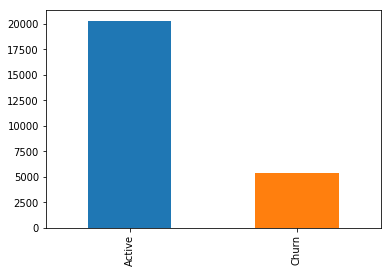

In [45]:
#Churn is less if there is discount
df_top3_w_discount['CHURN_STATUS'].value_counts().plot(kind='bar')

In [46]:
#dataframe for showing discount = 0
df_top3_wo_discount = df_top3.loc[(df["TOT_INVOICE_AMT"] - df["TOT_PAID_AMT"]) == 0.0]
df_top3_wo_discount.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN,DISCOUNT
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE,0.0
3,226167,GA,ACTIVATION,Active,658.80,658.80,14,3,100 MINUTE,0.0
5,309477,GA,ACTIVATION,Active,187.76,187.76,10,3,BASIC,0.0
6,318975,GA,ACTIVATION,Active,402.40,402.40,8,3,200 MINUTE,0.0
7,203574,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,491.30,491.30,6,3,100 MINUTE,0.0


In [47]:
pd.pivot_table(df_top3_wo_discount, values="TOT_INVOICE_AMT", index=["CHURN_STATUS"], aggfunc = "count",fill_value=0)

,TOT_INVOICE_AMT
CHURN_STATUS,
Active,13218
Churn,26099


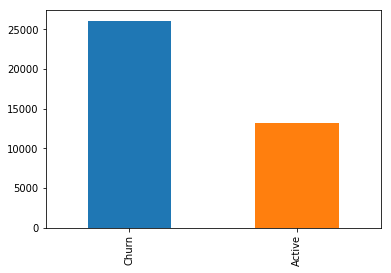

In [48]:
#Churn is more if there is zero discount
df_top3_wo_discount['CHURN_STATUS'].value_counts().plot(kind='bar')

In [23]:
#pd.pivot_table(df_top3, values="TOT_INVOICE_AMT", columns="RATE_PLAN", index=["CHURN_STATUS"], aggfunc = "count",fill_value=0)

In [24]:
#pd.pivot_table(df_top3_ZeroBal, values="TOT_INVOICE_AMT", columns="RATE_PLAN", index=["CHURN_STATUS"], aggfunc = "count",fill_value=0)

In [25]:
#pd.pivot_table(df_top3_NonZeroBal, values="TOT_INVOICE_AMT", columns="RATE_PLAN", index=["CHURN_STATUS"], aggfunc = "count",fill_value=0)

In [49]:
#groupby
#2nd rule - churn is more if Rate PLan = 100 and Other
df.groupby(['RATE_PLAN','CHURN_STATUS'])['CUSTOMERID'].count()

RATE_PLAN   CHURN_STATUS
100 MINUTE  Active           2182
            Churn            5328
200 MINUTE  Active          12255
            Churn            7291
300 MINUTE  Active           3770
            Churn            3658
BASIC       Active           4723
            Churn            2241
OTHER       Active           6626
            Churn           10011
UNLIMITED   Active           4120
            Churn            3329
Name: CUSTOMERID, dtype: int64

In [ ]:
#End second rule

In [ ]:
#3rd rule - Billing NonPayment has highest no of churn

In [59]:
df_top3Churn = df_top3.loc[df_top3['CHURN_STATUS'] == 'Churn']
df_top3Churn.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN,DISCOUNT
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE,0.0
7,203574,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,491.30,491.30,6,3,100 MINUTE,0.0
13,127167,GA,LOW USAGE,Churn,1881.91,1705.71,20,3,100 MINUTE,176.2
14,184785,GA,OTHER,Churn,363.17,363.17,8,3,OTHER,0.0
18,339882,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,1119.18,1119.18,9,3,200 MINUTE,0.0


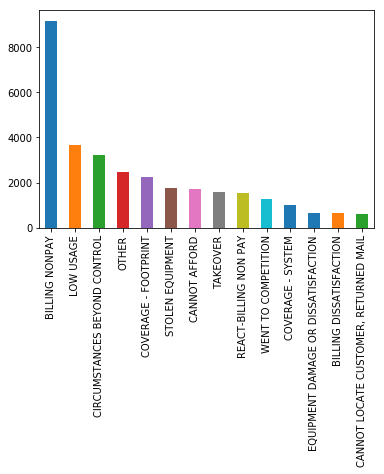

In [53]:
df_top3Churn['CHURN_REASON'].value_counts().plot(kind='bar')

In [ ]:
#4th Rule - Invoice amount<=2600 has highest no of churn

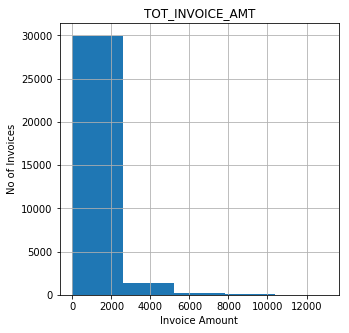

In [55]:
#df_top3.hist(['TOT_INVOICE_AMT','TOT_PAID_AMT','Balance'],figsize=(20,20))
binsize = [0,2600,5200,7800,10400,13000]
df_top3Churn.hist(['TOT_INVOICE_AMT'],bins = binsize, figsize=(5,5))
plt.xlabel('Invoice Amount')
plt.ylabel('No of Invoices')

In [65]:
df_top3Churn.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN,DISCOUNT,invoiceBin
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE,0.0,2600-5200
7,203574,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,491.30,491.30,6,3,100 MINUTE,0.0,<=2600
13,127167,GA,LOW USAGE,Churn,1881.91,1705.71,20,3,100 MINUTE,176.2,<=2600
14,184785,GA,OTHER,Churn,363.17,363.17,8,3,OTHER,0.0,<=2600
18,339882,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,1119.18,1119.18,9,3,200 MINUTE,0.0,<=2600


In [66]:
df_top3Churn['invoiceBin'] = np.where(df_top3Churn['TOT_INVOICE_AMT'] <=2600,'<=2600', (np.where(df_top3Churn['TOT_INVOICE_AMT']> 5200 ,'>5200', '2600-5200')))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
pd.pivot_table(df_top3Churn, values="TOT_INVOICE_AMT", index=["invoiceBin"], columns="CHURN_REASON", aggfunc = "count",fill_value=0)

CHURN_REASON,BILLING DISSATISFACTION,BILLING NONPAY,CANNOT AFFORD,"CANNOT LOCATE CUSTOMER, RETURNED MAIL",CIRCUMSTANCES BEYOND CONTROL,COVERAGE - FOOTPRINT,COVERAGE - SYSTEM,EQUIPMENT DAMAGE OR DISSATISFACTION,LOW USAGE,OTHER,REACT-BILLING NON PAY,STOLEN EQUIPMENT,TAKEOVER,WENT TO COMPETITION
invoiceBin,,,,,,,,,,,,,,
2600-5200,25,398,48,21,97,21,12,21,91,117,291,83,75,55
<=2600,617,8739,1640,570,3127,2212,970,630,3553,2343,1173,1644,1499,1210
>5200,2,35,8,2,14,1,4,2,24,13,65,17,22,11


In [ ]:
#end 4th rule

In [72]:
#train/test data set
trainChurn, testChurn = np.split(df_top3Churn.sample(frac=1), [int(.7*len(df_top3))])

In [68]:
#df_churn_groupby = df_churn.groupby(['STATE'])['CUSTOMERID'].count()
#df_churn_groupby

In [69]:
#df_top3Churn.describe()

#Outlier Analysis using boxplot

In [70]:
#df_top3Churn.boxplot(['TOT_INVOICE_AMT','TOT_PAID_AMT'],figsize=(20,10))

In [71]:
#df_top3Churn.boxplot(['Balance'],figsize=(20,10))

#Range and Shape Analysis using histogram

#Relation analysis

In [51]:
#train/test data set
trainChurn, testChurn = np.split(df_top3Churn.sample(frac=1), [int(.7*len(df_top3))])

In [52]:
df_top3Churn.head()

,CUSTOMERID,STATE,CHURN_REASON,CHURN_STATUS,TOT_INVOICE_AMT,TOT_PAID_AMT,NUM_INVOICES,NO_SERVICES,RATE_PLAN,Balance,invoiceBin
2,186282,GA,BILLING NONPAY,Churn,2874.47,2874.47,13,3,300 MINUTE,0.0,2600-5200
7,203574,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,491.30,491.30,6,3,100 MINUTE,0.0,<=2600
13,127167,GA,LOW USAGE,Churn,1881.91,1705.71,20,3,100 MINUTE,176.2,<=2600
14,184785,GA,OTHER,Churn,363.17,363.17,8,3,OTHER,0.0,<=2600
18,339882,GA,CIRCUMSTANCES BEYOND CONTROL,Churn,1119.18,1119.18,9,3,200 MINUTE,0.0,<=2600


In [53]:
pd.pivot_table(df_top3Churn, values="TOT_INVOICE_AMT", index=["invoiceBin"], columns="CHURN_REASON", aggfunc = "count",fill_value=0)

CHURN_REASON,BILLING DISSATISFACTION,BILLING NONPAY,CANNOT AFFORD,"CANNOT LOCATE CUSTOMER, RETURNED MAIL",CIRCUMSTANCES BEYOND CONTROL,COVERAGE - FOOTPRINT,COVERAGE - SYSTEM,EQUIPMENT DAMAGE OR DISSATISFACTION,LOW USAGE,OTHER,REACT-BILLING NON PAY,STOLEN EQUIPMENT,TAKEOVER,WENT TO COMPETITION
invoiceBin,,,,,,,,,,,,,,
2600-5200,25,398,48,21,97,21,12,21,91,117,291,83,75,55
<=2600,617,8739,1640,570,3127,2212,970,630,3553,2343,1173,1644,1499,1210
>5200,2,35,8,2,14,1,4,2,24,13,65,17,22,11


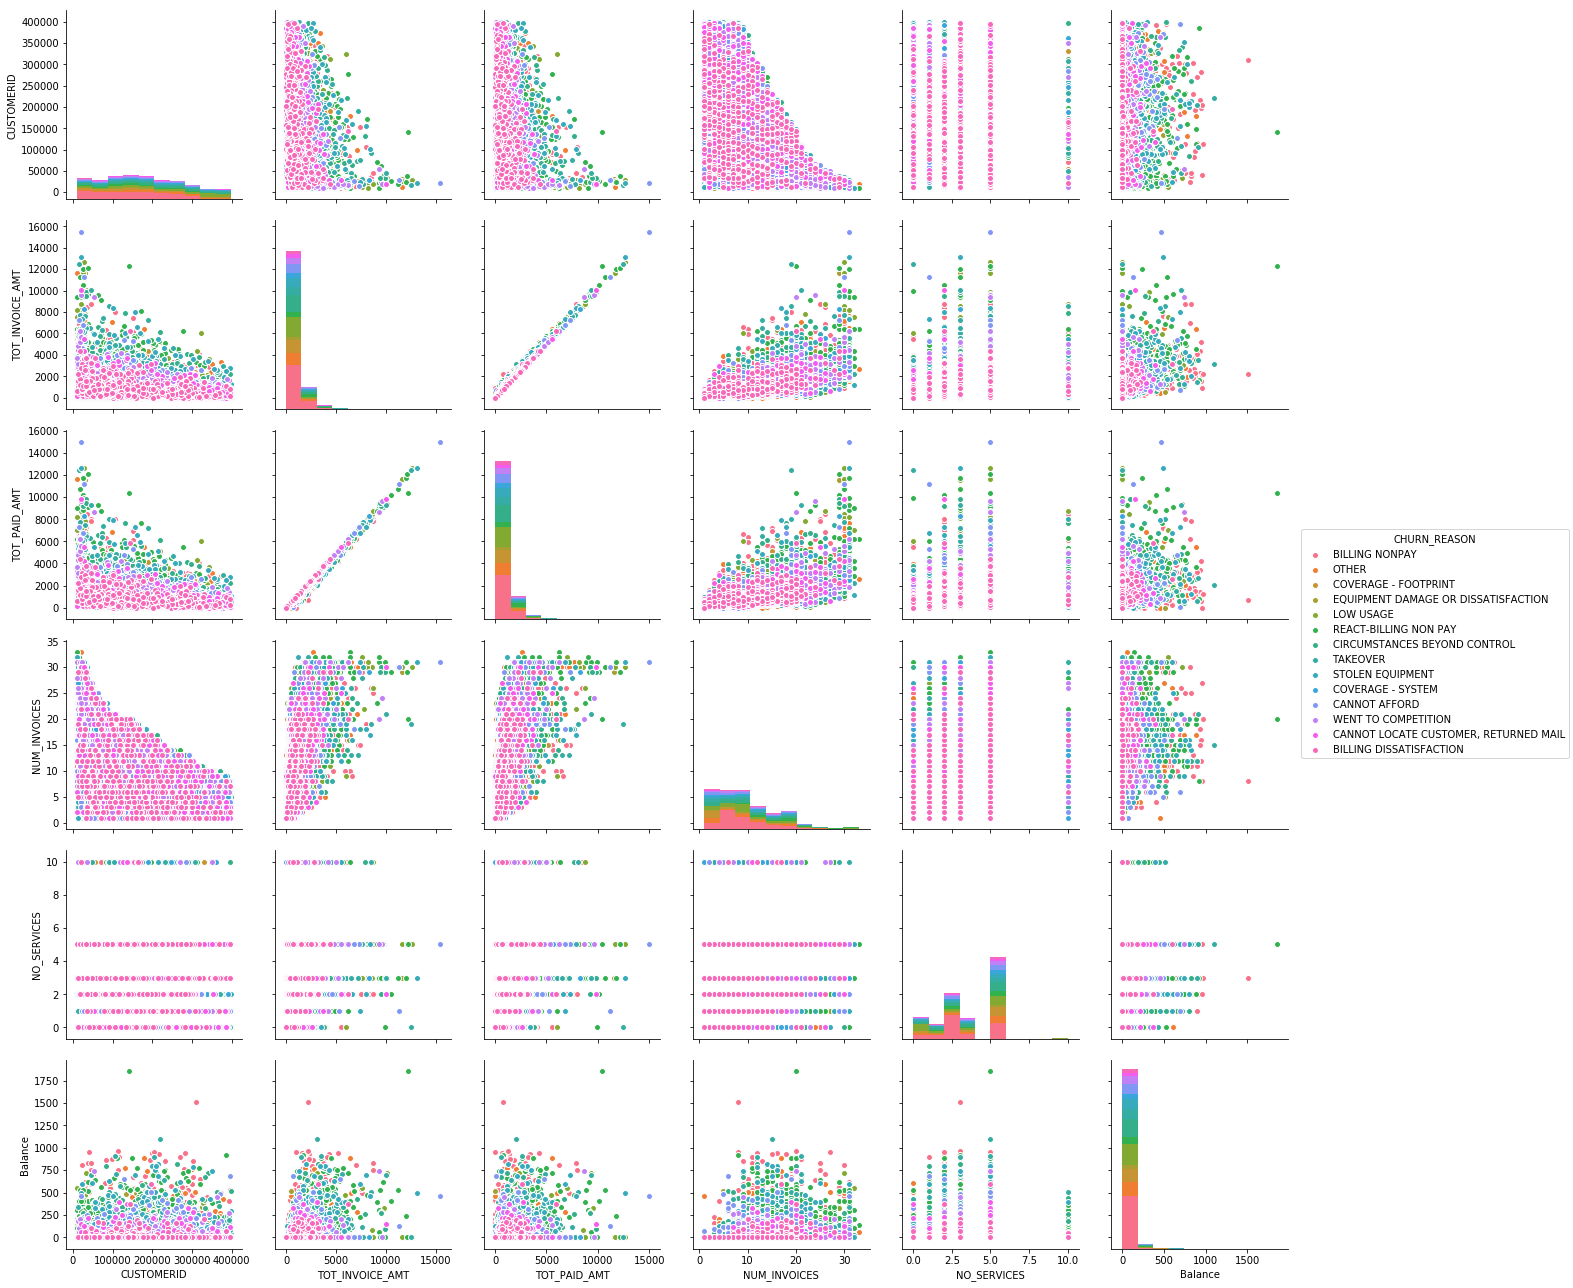

In [54]:
sns_plot = sns.pairplot(trainChurn, hue='CHURN_REASON', size=3)
sns_plot.savefig("c:\\datasets\\churn_train.png")

In [55]:
#pivot for train dataset
pd.pivot_table(trainChurn, values="TOT_INVOICE_AMT", index=["invoiceBin"], columns="CHURN_REASON", aggfunc = "count",fill_value=0)

CHURN_REASON,BILLING DISSATISFACTION,BILLING NONPAY,CANNOT AFFORD,"CANNOT LOCATE CUSTOMER, RETURNED MAIL",CIRCUMSTANCES BEYOND CONTROL,COVERAGE - FOOTPRINT,COVERAGE - SYSTEM,EQUIPMENT DAMAGE OR DISSATISFACTION,LOW USAGE,OTHER,REACT-BILLING NON PAY,STOLEN EQUIPMENT,TAKEOVER,WENT TO COMPETITION
invoiceBin,,,,,,,,,,,,,,
2600-5200,16,264,30,16,66,18,10,16,60,74,205,61,52,34
<=2600,458,6087,1147,405,2162,1548,686,442,2516,1611,841,1149,1063,855
>5200,1,31,6,2,11,0,3,1,16,9,44,14,16,5


In [56]:
#pivot for test dataset
pd.pivot_table(testChurn, values="TOT_INVOICE_AMT", index=["invoiceBin"], columns="CHURN_REASON", aggfunc = "count",fill_value=0)

CHURN_REASON,BILLING DISSATISFACTION,BILLING NONPAY,CANNOT AFFORD,"CANNOT LOCATE CUSTOMER, RETURNED MAIL",CIRCUMSTANCES BEYOND CONTROL,COVERAGE - FOOTPRINT,COVERAGE - SYSTEM,EQUIPMENT DAMAGE OR DISSATISFACTION,LOW USAGE,OTHER,REACT-BILLING NON PAY,STOLEN EQUIPMENT,TAKEOVER,WENT TO COMPETITION
invoiceBin,,,,,,,,,,,,,,
2600-5200,9,134,18,5,31,3,2,5,31,43,86,22,23,21
<=2600,159,2652,493,165,965,664,284,188,1037,732,332,495,436,355
>5200,1,4,2,0,3,1,1,1,8,4,21,3,6,6


In [57]:
df_top3Churn'CHURN_REASON'].value_counts()
#df_top3.groupby('CHURN_REASON').count()

SyntaxError: invalid syntax (<ipython-input-57-7126433cab37>, line 1)

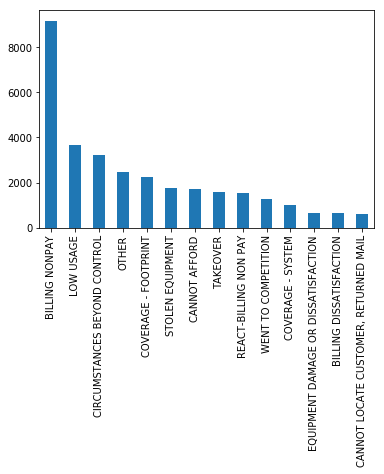

In [58]:
df_top3Churn['CHURN_REASON'].value_counts().plot(kind='bar')

In [59]:
trainChurn['CHURN_REASON'].value_counts()

BILLING NONPAY                           6382
LOW USAGE                                2592
CIRCUMSTANCES BEYOND CONTROL             2239
OTHER                                    1694
COVERAGE - FOOTPRINT                     1566
STOLEN EQUIPMENT                         1224
CANNOT AFFORD                            1183
TAKEOVER                                 1131
REACT-BILLING NON PAY                    1090
WENT TO COMPETITION                       894
COVERAGE - SYSTEM                         699
BILLING DISSATISFACTION                   475
EQUIPMENT DAMAGE OR DISSATISFACTION       459
CANNOT LOCATE CUSTOMER, RETURNED MAIL     423
Name: CHURN_REASON, dtype: int64

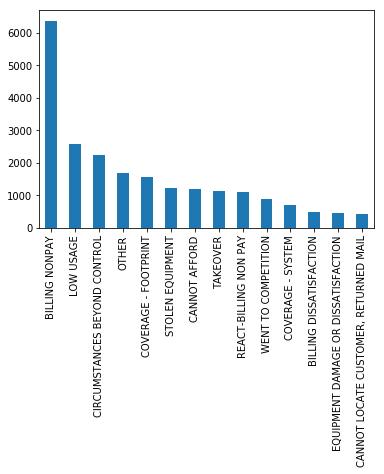

In [60]:
trainChurn['CHURN_REASON'].value_counts().plot(kind='bar')

In [61]:
testChurn['CHURN_REASON'].value_counts()

BILLING NONPAY                           2790
LOW USAGE                                1076
CIRCUMSTANCES BEYOND CONTROL              999
OTHER                                     779
COVERAGE - FOOTPRINT                      668
STOLEN EQUIPMENT                          520
CANNOT AFFORD                             513
TAKEOVER                                  465
REACT-BILLING NON PAY                     439
WENT TO COMPETITION                       382
COVERAGE - SYSTEM                         287
EQUIPMENT DAMAGE OR DISSATISFACTION       194
CANNOT LOCATE CUSTOMER, RETURNED MAIL     170
BILLING DISSATISFACTION                   169
Name: CHURN_REASON, dtype: int64

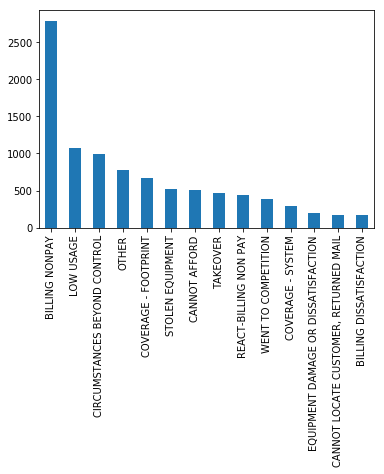

In [62]:
testChurn['CHURN_REASON'].value_counts().plot(kind='bar')

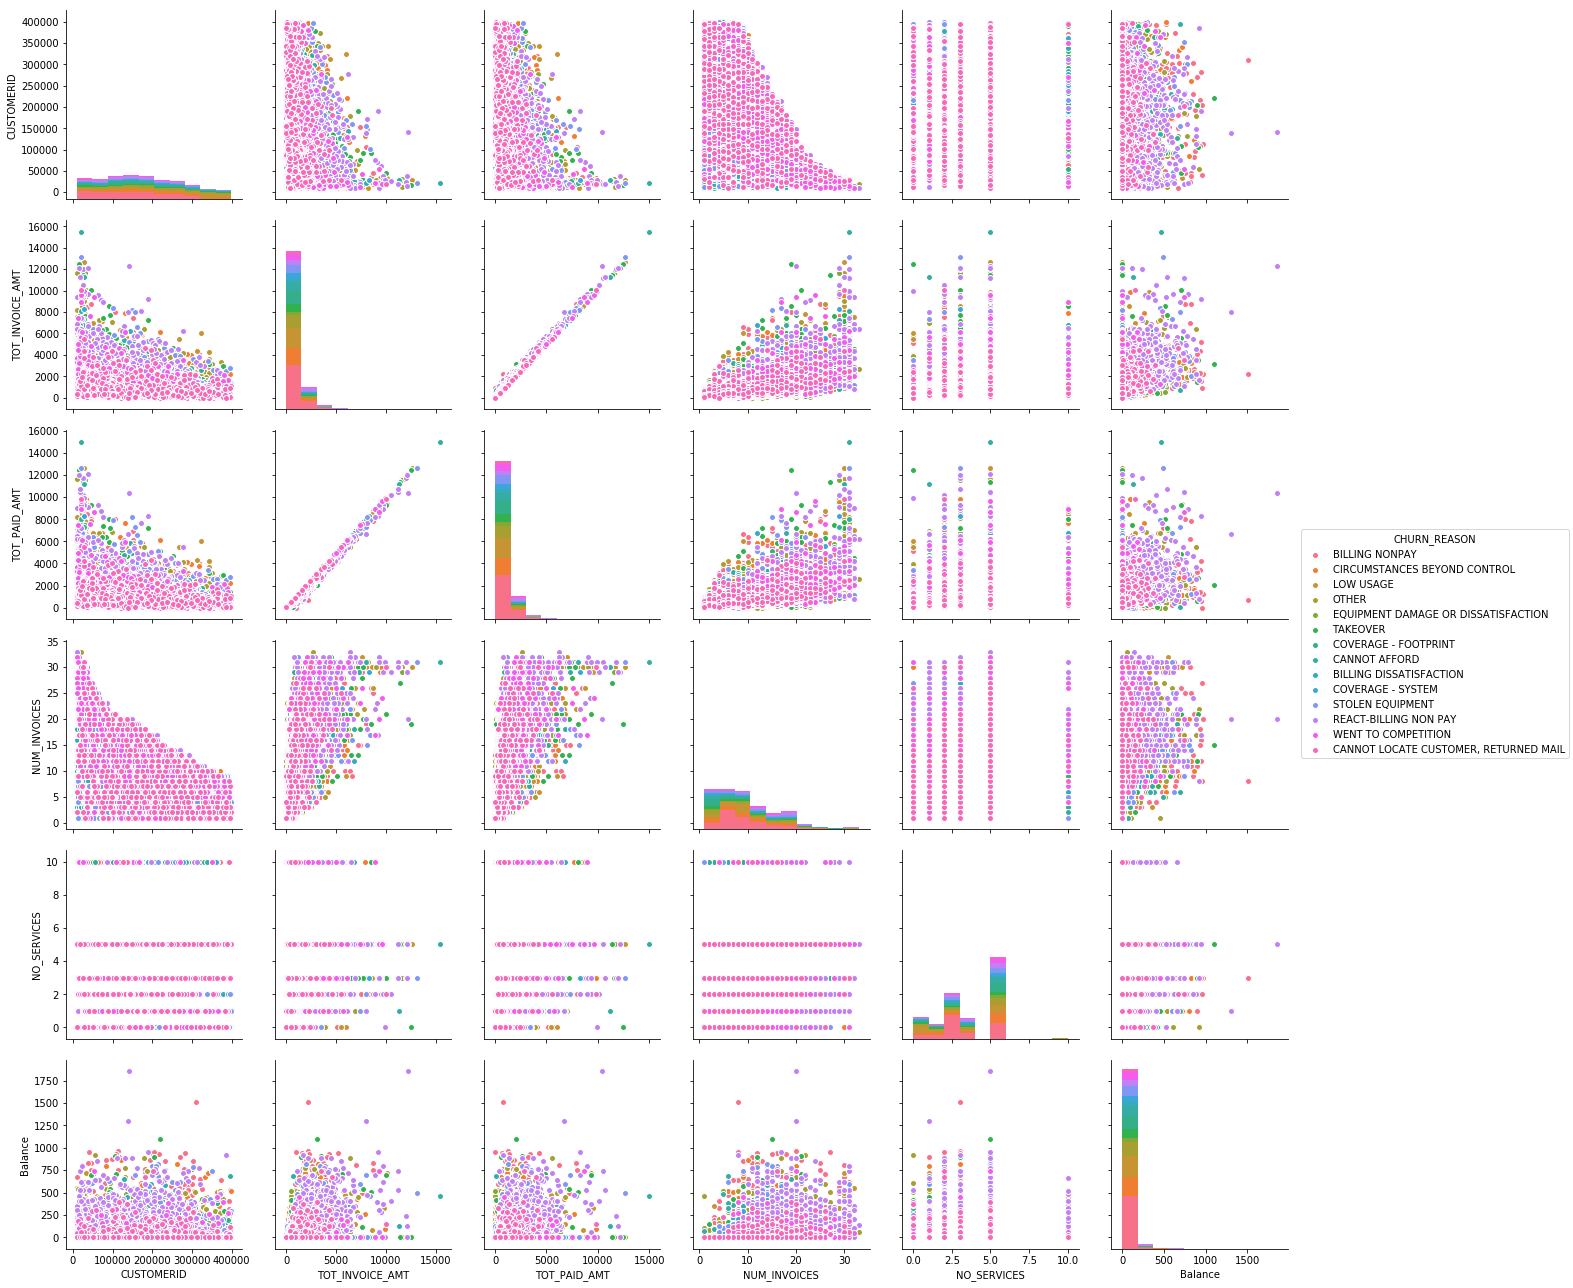

In [63]:
sns_plot1 = sns.pairplot(df_top3Churn, hue="CHURN_REASON", size=3)
sns_plot1.savefig("c:\\datasets\\churn_dftop31.png")

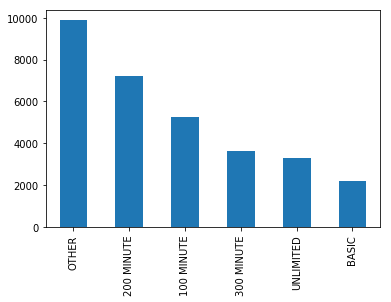

In [64]:
df_top3Churn['RATE_PLAN'].value_counts().plot(kind='bar')

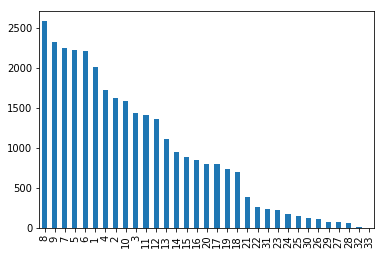

In [66]:
df_top3Churn['NUM_INVOICES'].value_counts().plot(kind='bar')

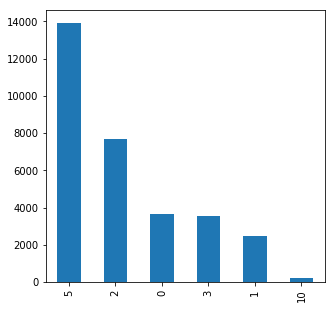

In [67]:
df_top3Churn['NO_SERVICES'].value_counts().plot(kind='bar',figsize = (5,5))